In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib.pyplot import imshow

In [3]:
#abro los archivos csv con los datos
df_train=pd.read_csv('training.csv') #aqui hay coordenadas de los keypoints
df_test=pd.read_csv('test.csv') #imageId, Image
df_test

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


In [4]:
imagenes=[] #esta sera la lista que contenga cada imagen
#Hago un for para agregar las imagenes del datafram df_test
for N in range(len(df_test)):
    imagen=df_test.values[N][1].split() #df.values[N][1] # no se exactamente porque 1, solo se que el valor 0 no me dice nada y solo hay dos valores posibles. Split es para que convierta el string a int
    im_array = np.int8(np.reshape(imagen, (96, 96)))
    #Con reshape ajustamos la imagen
    imagenes.append(im_array) #Agrego la imagen ajustada
     # create a 2D array from flat array
#img = Image.fromarray(im_array, 'L') # convert to a                PIL.Image object ('L' is for grayscale)

#imshow(np.asarray(img))
len(imagenes)


1783

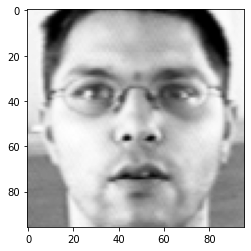

In [9]:
img = Image.fromarray(imagenes[31], 'L')
imshow(np.asarray(img), cmap='gray')

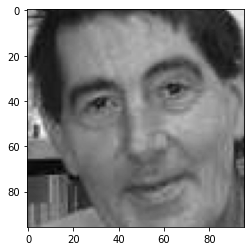

In [10]:
#Con esto imprimo el numero de imagen que quiera
img = Image.fromarray(imagenes[1353], 'L')
imshow(np.asarray(img), cmap='gray')
#aqui lo que me gustaria es poder ver varias imagenes y a además que esten en blacno y negro

Hasta ahora solo pude mostrar la imagen. En este notebook mi intención es entrenar un model de deep learning para que reconozca keypoints  

In [11]:
df_train.values[0][2] #[Numero de imagen][coordenada de punto]

30.2270075188

In [12]:
#defino una función que me convierta el texto en un np array
def text_to_numpy(s):
    return np.array([int(x) for x in s.split()]).reshape([96,96]) #split convierte string en una lista separada por espacios
#reshape me da una lista con listas en este caso me da 96 listas de 96 elementos, o sea divido los pixeles por filas. 
#en el for le digo que me de el valor entero de x por cada x que esta en la lista s.